# Machine Learning

In [68]:
import pandas as pd
import dask.array as da
import dask.dataframe as dd
import matplotlib.pyplot as plt

Procedemos cargar el dataframe Dask a partir de los archivos Parquet

In [69]:
path_i = "./data/input/parquet/"
dd_icfes = dd.read_parquet(path_i)

In [70]:
columns_to_drop = ['ESTU_CONSECUTIVO']
dd_icfes = dd_icfes.drop(columns = columns_to_drop)

In [71]:
dd_icfes.compute()

,PUNTAJE,CAT_ESTU_GENERO_ES_F,CAT_ESTU_GENERO_ES_M,CAT_ESTU_DEDICACIONLECTURADIARIA,CAT_ESTU_DEDICACIONINTERNET,CAT_FAMI_TIENEINTERNET_ES_SI,CAT_FAMI_TIENEINTERNET_ES_NO,CAT_FAMI_TIENECOMPUTADOR_ES_SI,CAT_FAMI_TIENECOMPUTADOR_ES_NO,CAT_FAMI_ESTRATOVIVIENDA,...,CAT_COLE_CARACTER_ES_TÉCNICO,CAT_COLE_CARACTER_ES_NO APLICA,CAT_COLE_CARACTER_ES_TÉCNICO/ACADÉMICO,CAT_COLE_CARACTER_ES_ACADÉMICO,CAT_COLE_JORNADA_ES_NOCHE,CAT_COLE_JORNADA_ES_SABATINA,CAT_COLE_JORNADA_ES_MAÑANA,CAT_COLE_JORNADA_ES_TARDE,CAT_COLE_JORNADA_ES_COMPLETA,CAT_COLE_JORNADA_ES_UNICA
0,377,0.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,246,1.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,292,1.0,0.0,2.0,3.0,1.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,291,0.0,1.0,2.0,4.0,1.0,0.0,1.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,314,1.0,0.0,1.0,4.0,1.0,0.0,1.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314346,368,1.0,0.0,2.0,4.0,1.0,0.0,1.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3314347,364,1.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3314348,310,1.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3314349,333,1.0,0.0,3.0,4.0,1.0,0.0,1.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Verificaremos si hay valores en null en el dataframe, caso en el cual procederemos a eliminar las filas que los tengan

In [72]:
dd_icfes.isnull().sum().compute()

PUNTAJE                                        0
CAT_ESTU_GENERO_ES_F                           0
CAT_ESTU_GENERO_ES_M                           0
CAT_ESTU_DEDICACIONLECTURADIARIA          172269
CAT_ESTU_DEDICACIONINTERNET               179880
CAT_FAMI_TIENEINTERNET_ES_SI                   0
CAT_FAMI_TIENEINTERNET_ES_NO                   0
CAT_FAMI_TIENECOMPUTADOR_ES_SI                 0
CAT_FAMI_TIENECOMPUTADOR_ES_NO                 0
CAT_FAMI_ESTRATOVIVIENDA                  188304
CAT_FAMI_EDUCACIONPADRE                   164714
CAT_FAMI_EDUCACIONMADRE                   164953
CAT_FAMI_NUMLIBROS                        228214
CAT_FAMI_COMELECHEDERIVADOS               190600
CAT_FAMI_COMECARNEPESCADOHUEVO            176245
CAT_FAMI_SITUACIONECONOMICA               107117
CAT_COLE_NATURALEZA_ES_NO OFICIAL              0
CAT_COLE_NATURALEZA_ES_OFICIAL                 0
CAT_COLE_CALENDARIO_ES_OTRO                    0
CAT_COLE_CALENDARIO_ES_B                       0
CAT_COLE_CALENDARIO_

In [73]:
dd_icfes = dd_icfes.dropna(subset = ['CAT_FAMI_ESTRATOVIVIENDA'])
dd_icfes = dd_icfes.dropna(subset = ['CAT_FAMI_EDUCACIONPADRE'])
dd_icfes = dd_icfes.dropna(subset = ['CAT_FAMI_EDUCACIONMADRE'])
dd_icfes = dd_icfes.dropna(subset = ['CAT_FAMI_NUMLIBROS'])
dd_icfes = dd_icfes.dropna(subset = ['CAT_FAMI_SITUACIONECONOMICA'])
dd_icfes = dd_icfes.dropna(subset = ['CAT_FAMI_COMELECHEDERIVADOS'])
dd_icfes = dd_icfes.dropna(subset = ['CAT_ESTU_DEDICACIONINTERNET'])
dd_icfes = dd_icfes.dropna(subset = ['CAT_ESTU_DEDICACIONLECTURADIARIA'])
dd_icfes = dd_icfes.dropna(subset = ['CAT_FAMI_COMECARNEPESCADOHUEVO'])

In [74]:
dd_icfes.isnull().sum().compute()

PUNTAJE                                   0
CAT_ESTU_GENERO_ES_F                      0
CAT_ESTU_GENERO_ES_M                      0
CAT_ESTU_DEDICACIONLECTURADIARIA          0
CAT_ESTU_DEDICACIONINTERNET               0
CAT_FAMI_TIENEINTERNET_ES_SI              0
CAT_FAMI_TIENEINTERNET_ES_NO              0
CAT_FAMI_TIENECOMPUTADOR_ES_SI            0
CAT_FAMI_TIENECOMPUTADOR_ES_NO            0
CAT_FAMI_ESTRATOVIVIENDA                  0
CAT_FAMI_EDUCACIONPADRE                   0
CAT_FAMI_EDUCACIONMADRE                   0
CAT_FAMI_NUMLIBROS                        0
CAT_FAMI_COMELECHEDERIVADOS               0
CAT_FAMI_COMECARNEPESCADOHUEVO            0
CAT_FAMI_SITUACIONECONOMICA               0
CAT_COLE_NATURALEZA_ES_NO OFICIAL         0
CAT_COLE_NATURALEZA_ES_OFICIAL            0
CAT_COLE_CALENDARIO_ES_OTRO               0
CAT_COLE_CALENDARIO_ES_B                  0
CAT_COLE_CALENDARIO_ES_A                  0
CAT_COLE_CARACTER_ES_TÉCNICO              0
CAT_COLE_CARACTER_ES_NO APLICA  

In [75]:
dd_icfes.compute()

,PUNTAJE,CAT_ESTU_GENERO_ES_F,CAT_ESTU_GENERO_ES_M,CAT_ESTU_DEDICACIONLECTURADIARIA,CAT_ESTU_DEDICACIONINTERNET,CAT_FAMI_TIENEINTERNET_ES_SI,CAT_FAMI_TIENEINTERNET_ES_NO,CAT_FAMI_TIENECOMPUTADOR_ES_SI,CAT_FAMI_TIENECOMPUTADOR_ES_NO,CAT_FAMI_ESTRATOVIVIENDA,...,CAT_COLE_CARACTER_ES_TÉCNICO,CAT_COLE_CARACTER_ES_NO APLICA,CAT_COLE_CARACTER_ES_TÉCNICO/ACADÉMICO,CAT_COLE_CARACTER_ES_ACADÉMICO,CAT_COLE_JORNADA_ES_NOCHE,CAT_COLE_JORNADA_ES_SABATINA,CAT_COLE_JORNADA_ES_MAÑANA,CAT_COLE_JORNADA_ES_TARDE,CAT_COLE_JORNADA_ES_COMPLETA,CAT_COLE_JORNADA_ES_UNICA
0,377,0.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,246,1.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,292,1.0,0.0,2.0,3.0,1.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,291,0.0,1.0,2.0,4.0,1.0,0.0,1.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,314,1.0,0.0,1.0,4.0,1.0,0.0,1.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314346,368,1.0,0.0,2.0,4.0,1.0,0.0,1.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3314347,364,1.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3314348,310,1.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3314349,333,1.0,0.0,3.0,4.0,1.0,0.0,1.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
dd_icfes.isnull().sum().compute()

PUNTAJE                                   0
CAT_ESTU_GENERO_ES_F                      0
CAT_ESTU_GENERO_ES_M                      0
CAT_ESTU_DEDICACIONLECTURADIARIA          0
CAT_ESTU_DEDICACIONINTERNET               0
CAT_FAMI_TIENEINTERNET_ES_SI              0
CAT_FAMI_TIENEINTERNET_ES_NO              0
CAT_FAMI_TIENECOMPUTADOR_ES_SI            0
CAT_FAMI_TIENECOMPUTADOR_ES_NO            0
CAT_FAMI_ESTRATOVIVIENDA                  0
CAT_FAMI_EDUCACIONPADRE                   0
CAT_FAMI_EDUCACIONMADRE                   0
CAT_FAMI_NUMLIBROS                        0
CAT_FAMI_COMELECHEDERIVADOS               0
CAT_FAMI_COMECARNEPESCADOHUEVO            0
CAT_FAMI_SITUACIONECONOMICA               0
CAT_COLE_NATURALEZA_ES_NO OFICIAL         0
CAT_COLE_NATURALEZA_ES_OFICIAL            0
CAT_COLE_CALENDARIO_ES_OTRO               0
CAT_COLE_CALENDARIO_ES_B                  0
CAT_COLE_CALENDARIO_ES_A                  0
CAT_COLE_CARACTER_ES_TÉCNICO              0
CAT_COLE_CARACTER_ES_NO APLICA  

Vamos a generar una variable adicional que permita hacer la clasificación respecto a una de las categorías del puntaje global para determinar si se aprueba o no la prueba Saber11 por parte del estudiante.

La nueva variable APROBAR_EXAMEN tendrá el valor 1 para resultados en la prueba global correspondientes a puntaje global entre 300 y 500 puntos. Para efectos del análisis, podemos cambiar el valor respecto al cual se genera la nueva variable.

In [77]:
def gen_dataset(df, var, new_var, score):
    """"
    Función gen_dataset: Generar dataset con nueva columna para analisis basado en un valor.
    
    Parámetros:
        df  (dataframe): Dataframe con los datos
        var    (string): Variable a analizar
        new_var(string): Nombre de variable a generar
        score     (int): Valor de comparación para la generación de la nueva variable
    
    Return:
        df  (dataframe): Dataframe con la nueva columna.
    
    Ejemplo:
    
        >>> df_icfes_clas = gen_dataset(df_icfes, 'CAT_PUNT_GLOBAL', 'APROBAR_EXAMEN', 2)
        done
    """
    df[new_var] = df.apply(lambda x: 1 if (x[var] >= score) else 0, axis=1, meta = ('int'))
    df = df.astype({col: 'int16' for col in df.select_dtypes('int64').columns})
    print("done")
    return df

In [78]:
dd_icfes = gen_dataset(dd_icfes, 'PUNTAJE', 'APROBAR_EXAMEN', 300)

done


In [79]:
dd_icfes.groupby(['PUNTAJE'])['PUNTAJE'].count().compute()

PUNTAJE
85         1
88         1
94         1
102        1
105        1
108        1
109        2
113        5
114        3
116        3
118        4
122        6
123        9
124        4
125       17
126       12
127       23
128       36
129       28
130       52
131       50
132       79
133      104
134      107
135      153
136      148
137      220
138      308
139      235
140      450
141      342
142      649
143      626
144      608
145      992
146      650
147     1204
148     1473
149     1071
150     1830
151     1299
152     2297
153     2433
154     1847
155     3121
156     2251
157     3621
158     4036
159     2963
160     4696
161     3401
162     5624
163     5835
164     4325
165     6720
166     4910
167     7725
168     8097
169     5627
170     8903
171     6188
172     9862
173    10125
174     7082
175    10776
176     7558
177    11825
178    12302
179     8423
180    13067
181     8843
182    13652
183    14218
184     9708
185    14842
186    10066
187 

In [80]:
dd_icfes.groupby(['APROBAR_EXAMEN'])['APROBAR_EXAMEN'].count().compute()

APROBAR_EXAMEN
0    2374171
1     583180
Name: APROBAR_EXAMEN, dtype: int64

Generaremos un nuevo dataframe con las características balanceadas, teniendo en cuenta el desbalance que se observa en las mismas para la variable APROBAR_EXAMEN

In [81]:
import numpy as np

def gen_balanced_sample(df, var, score1, score2, frac = 1):
    """"
    Función gen_dataset: Generar dataset con nueva columna para analisis basado en un valor.

    Parámetros:
        df  (dataframe): Dataframe con los datos
        var    (string): Variable a analizar
        new_var(string): Nombre de variable a generar
        score     (int): Valor de comparación para la generación de la nueva variable

    Return:
        df  (dataframe): Dataframe con la nueva columna.

    Ejemplo:

        >>> df_icfes_clas = gen_dataset(df_icfes, 'CAT_PUNT_GLOBAL', 'APROBAR_EXAMEN', 2)
        done
    """
    # generar dataset balanceado entre las dos categorias de la variable target
    df1 = df.loc[df[var] == score1]
    df2 = df.loc[df[var] == score2]
    #
    # dataframe size
    size1 = len(df1[df1[var] == score1])
    size2 = len(df2[df2[var] == score2])
    #
    min_size = min(size1, size2)
    #
    # generate random sample
    if (min_size == size1):
        df_sample1 = df1
        df_sample2 = df2.sample(frac = (min_size / size2))
    else:
        df_sample1 = df1.sample(frac = (min_size / size1))
        df_sample2 = df2
    #
    normal_distributed_df = dd.concat([df_sample1, df_sample2])
    #
    # Shuffle dataframe rows
    df_sample = normal_distributed_df.sample(frac = frac, random_state=42)
    #
    print("done")
    return df_sample

In [82]:
dd_icfes_sample = gen_balanced_sample(df = dd_icfes, var = 'APROBAR_EXAMEN', score1 = 0, score2 = 1, frac = 1)

done


In [83]:
dd_icfes_sample.compute().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1166361 entries, 376036 to 3087406
Data columns (total 32 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   PUNTAJE                                 1166361 non-null  int16  
 1   CAT_ESTU_GENERO_ES_F                    1166361 non-null  float64
 2   CAT_ESTU_GENERO_ES_M                    1166361 non-null  float64
 3   CAT_ESTU_DEDICACIONLECTURADIARIA        1166361 non-null  float64
 4   CAT_ESTU_DEDICACIONINTERNET             1166361 non-null  float64
 5   CAT_FAMI_TIENEINTERNET_ES_SI            1166361 non-null  float64
 6   CAT_FAMI_TIENEINTERNET_ES_NO            1166361 non-null  float64
 7   CAT_FAMI_TIENECOMPUTADOR_ES_SI          1166361 non-null  float64
 8   CAT_FAMI_TIENECOMPUTADOR_ES_NO          1166361 non-null  float64
 9   CAT_FAMI_ESTRATOVIVIENDA                1166361 non-null  float64
 10  CAT_FAMI_EDUCACIONPADRE       

In [84]:
dd_icfes_sample.groupby(['APROBAR_EXAMEN'])['APROBAR_EXAMEN'].count().compute()

APROBAR_EXAMEN
0    583181
1    583180
Name: APROBAR_EXAMEN, dtype: int64

Con lo cual las etiquetas quedan balanceadas.

Realizamos al calculo de correlación de la variable APROBAR_EXAMEN contra las demas variables del dataframe con el fin de seleccionar las mas correlacionadas.

In [85]:
pd.options.display.max_rows = 999

In [86]:
def calc_corr(df, var):
    """"
    Función categorias: Crea columnas los valores de categorias para las variables cuantitativas

    Parámetros:
        df   (dataframe): Dataframe con los datos
        var     (string): Variable sobre la cual se realizara cálculo de la correlación respecto a las variables categoricas del dataframe.
                         La lista de las variables categoricas se encuentra en el archivo columns_category.csv.

    Return:
        corr    (Series): Serie de datos con el resultado de la correlación

    Ejemplo:

        >>> df_corr = calc_corr(df = df_icfes, var = 'CAT_PUNT_GLOBAL')

    """
    cols_list = df.columns.tolist()
    df_corr = df[df.columns.intersection(cols_list)]
    corr = df_corr.corr(numeric_only=True).compute()
    #corr = df_corr.corr(numeric_only=True)[var][::-1]
    return corr[var].sort_values()[::-1]

In [87]:
df_corr = calc_corr(df = dd_icfes_sample, var = 'APROBAR_EXAMEN')
df_corr

APROBAR_EXAMEN                            1.000000
PUNTAJE                                   0.835262
CAT_FAMI_EDUCACIONMADRE                   0.369296
CAT_FAMI_EDUCACIONPADRE                   0.326396
CAT_FAMI_NUMLIBROS                        0.324013
CAT_FAMI_TIENECOMPUTADOR_ES_SI            0.308709
CAT_FAMI_ESTRATOVIVIENDA                  0.298736
CAT_COLE_NATURALEZA_ES_NO OFICIAL         0.294674
CAT_FAMI_TIENEINTERNET_ES_SI              0.283381
CAT_COLE_JORNADA_ES_COMPLETA              0.282840
CAT_FAMI_COMELECHEDERIVADOS               0.261496
CAT_FAMI_COMECARNEPESCADOHUEVO            0.223811
CAT_ESTU_DEDICACIONINTERNET               0.207084
CAT_COLE_CALENDARIO_ES_B                  0.180115
CAT_ESTU_DEDICACIONLECTURADIARIA          0.152404
CAT_COLE_CARACTER_ES_ACADÉMICO            0.114153
CAT_ESTU_GENERO_ES_M                      0.084243
CAT_COLE_CARACTER_ES_NO APLICA           -0.025553
CAT_COLE_CALENDARIO_ES_OTRO              -0.026168
CAT_COLE_JORNADA_ES_UNICA      

Seleccionaremos como variable relevantes de acuerdo al coeficiente de correlacion las siguientes:

* CAT_FAMI_EDUCACIONMADRE                   0.369296
* CAT_FAMI_EDUCACIONPADRE                   0.326396
* CAT_FAMI_NUMLIBROS                        0.324013
* CAT_FAMI_TIENECOMPUTADOR_ES_SI            0.308709
* CAT_FAMI_ESTRATOVIVIENDA                  0.298736
* CAT_COLE_NATURALEZA_ES_NO OFICIAL         0.294674
* CAT_FAMI_TIENEINTERNET_ES_SI              0.283381
* CAT_COLE_JORNADA_ES_COMPLETA              0.282840
* CAT_FAMI_COMELECHEDERIVADOS               0.261496
* CAT_FAMI_COMECARNEPESCADOHUEVO            0.223811
* CAT_ESTU_DEDICACIONINTERNET               0.207084

por lo cual eliminaremos las demas:

In [88]:
columns_to_drop = ['CAT_COLE_CALENDARIO_ES_B','CAT_ESTU_DEDICACIONLECTURADIARIA','CAT_COLE_CARACTER_ES_ACADÉMICO','CAT_ESTU_GENERO_ES_M'
                   ,'CAT_COLE_CARACTER_ES_NO APLICA','CAT_COLE_CALENDARIO_ES_OTRO','CAT_COLE_JORNADA_ES_UNICA','CAT_COLE_CARACTER_ES_TÉCNICO'
                   ,'CAT_COLE_JORNADA_ES_TARDE','CAT_FAMI_SITUACIONECONOMICA','CAT_COLE_CARACTER_ES_TÉCNICO/ACADÉMICO','CAT_COLE_JORNADA_ES_MAÑANA'
                   ,'CAT_ESTU_GENERO_ES_F','CAT_COLE_JORNADA_ES_NOCHE','CAT_COLE_JORNADA_ES_SABATINA','CAT_COLE_CALENDARIO_ES_A'
                   ,'CAT_FAMI_TIENEINTERNET_ES_NO','CAT_COLE_NATURALEZA_ES_OFICIAL','CAT_FAMI_TIENECOMPUTADOR_ES_NO','PUNTAJE']
dd_icfes_sample = dd_icfes_sample.drop(columns = columns_to_drop)

In [89]:
dd_icfes_sample.compute()

,CAT_ESTU_DEDICACIONINTERNET,CAT_FAMI_TIENEINTERNET_ES_SI,CAT_FAMI_TIENECOMPUTADOR_ES_SI,CAT_FAMI_ESTRATOVIVIENDA,CAT_FAMI_EDUCACIONPADRE,CAT_FAMI_EDUCACIONMADRE,CAT_FAMI_NUMLIBROS,CAT_FAMI_COMELECHEDERIVADOS,CAT_FAMI_COMECARNEPESCADOHUEVO,CAT_COLE_NATURALEZA_ES_NO OFICIAL,CAT_COLE_JORNADA_ES_COMPLETA,APROBAR_EXAMEN
376036,1.0,1.0,1.0,2.0,9.0,9.0,0.0,2.0,3.0,1.0,1.0,0
222953,3.0,0.0,0.0,1.0,6.0,5.0,0.0,0.0,1.0,0.0,0.0,0
343404,0.0,0.0,0.0,1.0,5.0,5.0,1.0,1.0,1.0,0.0,0.0,0
584168,3.0,1.0,1.0,3.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,0
558505,2.0,0.0,0.0,0.0,6.0,6.0,0.0,1.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3103732,3.0,1.0,1.0,3.0,10.0,10.0,2.0,3.0,2.0,1.0,0.0,1
3078491,3.0,1.0,1.0,4.0,10.0,10.0,1.0,2.0,3.0,1.0,1.0,1
3107349,1.0,1.0,1.0,2.0,6.0,6.0,1.0,0.0,2.0,0.0,0.0,1
3247404,4.0,1.0,1.0,4.0,3.0,10.0,2.0,3.0,3.0,1.0,0.0,1


### Generación de vectores de características y etiquetas

In [92]:
def get_x_y(df, label):
    X = df.drop([label], axis = 1).to_dask_array(lengths=True)
    y = df[label].to_dask_array(lengths=True)
    return X, y

In [99]:
X, y = get_x_y(df = dd_icfes_sample, label = 'APROBAR_EXAMEN')
display(X.compute()[:2])
display(y.compute()[:2])

array([[1., 1., 1., 2., 9., 9., 0., 2., 3., 1., 1.],
       [3., 0., 0., 1., 6., 5., 0., 0., 1., 0., 0.]])

array([0, 0], dtype=int64)

In [100]:
X

dask.array<values, shape=(1166361, 11), dtype=float64, chunksize=(191630, 11), chunktype=numpy.ndarray>

In [101]:
y

dask.array<values, shape=(1166361,), dtype=int32, chunksize=(191630,), chunktype=numpy.ndarray>

In [102]:
print(X.shape[0])
print(y.shape[0])

1166361
1166361


### Generar particiones de entrenamiento y test

In [103]:
from dask_ml.model_selection import train_test_split

def get_splits(X, y, test_size, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = random_state)
    return X_train, X_test, y_train, y_test

def my_get_splits(df, label, test_size, random_state):
    df_train, df_test = df.random_split([1 - test_size, test_size], random_state=random_state)
    #
    X_train = df_train.drop([label], axis = 1).to_dask_array(lengths=True)
    y_train = df_train[label].to_dask_array(lengths=True)
    #
    X_test  = df_test.drop([label], axis = 1).to_dask_array(lengths=True)
    y_test  = df_test[label].to_dask_array(lengths=True)
    #
    return X_train, X_test, y_train, y_test

get_splits(X, y, 0.3, 42)

my_get_splits(df = dd_icfes, label = 'PUNTAJE', test_size = 0.3, random_state = 42)

In [104]:
X_train, X_test, y_train, y_test = get_splits(X, y, 0.3, 42)
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

816449
349911
816449
349911


In [105]:
X_train

dask.array<concatenate, shape=(816449, 11), dtype=float64, chunksize=(134141, 11), chunktype=numpy.ndarray>

In [106]:
y_train

dask.array<concatenate, shape=(816449,), dtype=int32, chunksize=(134141,), chunktype=numpy.ndarray>

In [107]:
X_test

dask.array<concatenate, shape=(349911, 11), dtype=float64, chunksize=(57489, 11), chunktype=numpy.ndarray>

In [108]:
y_test

dask.array<concatenate, shape=(349911,), dtype=int32, chunksize=(57489,), chunktype=numpy.ndarray>

### Preprocesamiento. Estandarización de datos

In [109]:
from dask_ml.preprocessing import MinMaxScaler

def preprocess_data(X_train, X_test):
    scaler = MinMaxScaler()
    X_train_t = scaler.fit_transform(X_train)
    X_test_t  = scaler.fit_transform(X_test)
    return X_train_t, X_test_t

In [110]:
X_train_t, X_test_t = preprocess_data(X_train, X_test)
print(X_train_t.shape[1])
print(X_test_t.shape[1])

11
11


In [111]:
X_train_t

dask.array<add, shape=(816449, 11), dtype=float64, chunksize=(134141, 11), chunktype=numpy.ndarray>

In [112]:
y_train

dask.array<concatenate, shape=(816449,), dtype=int32, chunksize=(134141,), chunktype=numpy.ndarray>

In [113]:
X_test_t

dask.array<add, shape=(349911, 11), dtype=float64, chunksize=(57489, 11), chunktype=numpy.ndarray>

### Entrenamiento

In [114]:
from dask_ml.linear_model import LogisticRegression

def get_model(X_train, y_train):
    model = LogisticRegression().fit(X_train, y_train)
    return model

In [115]:
model = get_model(X_train_t, y_train)
display(model.coef_)
display(model.intercept_)

array([0.14062031, 0.18660424, 0.19707863, 0.20598611, 0.42273256,
       0.74206502, 0.49422777, 0.18615382, 0.05037339, 0.11164613,
       0.31865316])

-1.5499596129359874

### Evaluación

In [116]:
from dask_ml.metrics import accuracy_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test.compute())
    acc = accuracy_score(y_test, y_pred)
    return acc

In [117]:
acc = evaluate_model(model, X_test_t, y_test)
print(acc)

0.7051278753740237


## Prueba con Random Forest

In [124]:
from dask.distributed import Client

client = Client(n_workers=4, threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 15.70 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:59282,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 15.70 GiB
Comm: tcp://127.0.0.1:59305,Total threads: 1
Dashboard: http://127.0.0.1:59307/status,Memory: 3.92 GiB
Nanny: tcp://127.0.0.1:59285,


2024-05-28 00:02:34,942 - distributed.core - ERROR - Exception while handling op register-client
Traceback (most recent call last):
  File "C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\core.py", line 970, in _handle_comm
    result = await result
  File "C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\scheduler.py", line 5710, in add_client
    await self.handle_stream(comm=comm, extra={"client": client})
  File "C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\core.py", line 1025, in handle_stream
    msgs = await comm.read()
  File "C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\comm\tcp.py", line 227, in read
    frames_nosplit = await read_bytes_rw(stream, frames_nosplit_nbytes)
  File "C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\comm\tcp.py", line 359, in read_bytes_rw
    buf = host_array(n)
  File "C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\pr

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred, target_names, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args:
      y_test:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      target_names:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_test, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        # change category codes or labels to new labels
        y_pred = [ymap[yi] for yi in y_pred]
        y_test = [ymap[yi] for yi in y_test]
        labels = [ymap[yi] for yi in target_names]
    # calculate a confusion matrix with the new labels
    #cm = confusion_matrix(y_test, y_pred, labels=target_names)
    cm = confusion_matrix(y_test, y_pred)
    # calculate row sums (for calculating % & plot annotations)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    # calculate proportions
    cm_perc = cm / cm_sum.astype(float) * 100
    # empty array for holding annotations for each cell in the heatmap
    annot = np.empty_like(cm).astype(str)
    # get the dimensions
    nrows, ncols = cm.shape
    # cycle over cells and create annotations for each cell
    for i in range(nrows):
        for j in range(ncols):
            # get the count for the cell
            c = cm[i, j]
            # get the percentage for the cell
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                # convert the proportion, count, and row sum to a string with pretty formatting
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    # convert the array to a dataframe. To plot by proportion instead of number, use cm_perc in the DataFrame instead of cm
    cm = pd.DataFrame(cm, index=target_names, columns=target_names)
    cm.index.name = 'Valor real'
    cm.columns.name = 'Valor predicho'
    # create empty figure with a specified size
    fig, ax = plt.subplots(figsize=figsize)
    # plot the data using the Pandas dataframe. To change the color map, add cmap=..., e.g. cmap = 'rocket_r'
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='Blues')
    #plt.savefig(filename)
    plt.show()
    return

In [126]:
target_names = ['No Aprueba', 'Si Aprueba']
seed = 42

In [127]:
from sklearn.ensemble import RandomForestClassifier
import joblib

In [128]:
# Random Forest
rfc_base = RandomForestClassifier(random_state = 42)

with joblib.parallel_backend('dask'):
    rfc_base.fit(X_train_t, y_train)

C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [129]:
y_pred_base = rfc_base.predict(X_test_t)

C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [130]:
y_pred_base

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_e

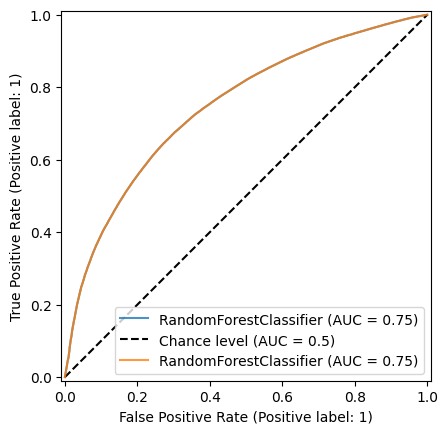

In [132]:
# Evaluating the model Random Forest
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc_base, X_test_t, y_test, ax=ax, alpha=0.8, plot_chance_level=True)
rfc_disp.plot(ax=ax, alpha=0.8)
plt.show()

C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


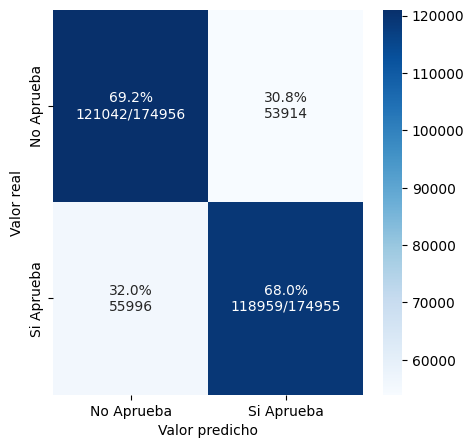

In [133]:
plot_confusion_matrix(y_test, y_pred_base, target_names, ymap=None, figsize=(5,5))

#### Estimación de parámetros con RandomizedSearchCV

In [135]:
import numpy as np
from sklearn.model_selection import (RandomizedSearchCV, StratifiedKFold)

In [137]:
rf_grid = {"n_estimators": np.arange(100, 200, 10),
           "max_depth": [None, 10, 25, 50],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}
#           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
#with joblib.parallel_backend('dask'):
rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1, random_state=42),
                              param_distributions=rf_grid,
                              n_iter=3,
                              cv=5,
                              verbose=3)
# fit
rs_model.fit(X_train_t, y_train)

C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 325.85 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask

[CV 1/5] END max_depth=10, max_features=1, min_samples_leaf=7, min_samples_split=16, n_estimators=130;, score=0.706 total time= 1.6min


C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 644.47 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 644.47 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\da

[CV 2/5] END max_depth=10, max_features=1, min_samples_leaf=7, min_samples_split=16, n_estimators=130;, score=0.707 total time= 1.9min


C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 319.25 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 319.25 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\da

[CV 3/5] END max_depth=10, max_features=1, min_samples_leaf=7, min_samples_split=16, n_estimators=130;, score=0.716 total time= 1.6min


C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 636.13 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 636.13 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\da

[CV 4/5] END max_depth=10, max_features=1, min_samples_leaf=7, min_samples_split=16, n_estimators=130;, score=0.716 total time= 2.0min


C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 0.94 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 0.94 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 416.62 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 416.62 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\da

[CV 5/5] END max_depth=10, max_features=1, min_samples_leaf=7, min_samples_split=16, n_estimators=130;, score=0.713 total time= 1.6min


C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 325.85 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 325.85 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\da

[CV 1/5] END max_depth=None, max_features=0.5, min_samples_leaf=13, min_samples_split=4, n_estimators=120;, score=0.707 total time= 2.2min


C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 644.47 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 644.47 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\da

[CV 2/5] END max_depth=None, max_features=0.5, min_samples_leaf=13, min_samples_split=4, n_estimators=120;, score=0.707 total time= 2.4min


C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 319.25 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 319.25 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\da

[CV 3/5] END max_depth=None, max_features=0.5, min_samples_leaf=13, min_samples_split=4, n_estimators=120;, score=0.716 total time= 2.0min


C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.04 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 636.13 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 636.13 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\da

[CV 4/5] END max_depth=None, max_features=0.5, min_samples_leaf=13, min_samples_split=4, n_estimators=120;, score=0.713 total time= 2.3min


C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 0.94 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 0.94 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 416.62 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 416.62 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\da

[CV 5/5] END max_depth=None, max_features=0.5, min_samples_leaf=13, min_samples_split=4, n_estimators=120;, score=0.711 total time= 2.2min
[CV 1/5] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190;, score=nan total time=   0.1s
[CV 2/5] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190;, score=nan total time=   0.0s
[CV 3/5] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190;, score=nan total time=   0.0s
[CV 4/5] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190;, score=nan total time=   0.1s
[CV 5/5] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190;, score=nan total time=   0.0s


C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [0.71144922 0.71098501        nan]
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=3,
                   param_distributions={'max_depth': [None, 10, 25, 50],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])},
                   verbose=3)

In [138]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [139]:
report(rs_model.cv_results_)

Model with rank: 1
Mean validation score: 0.711 (std: 0.004)
Parameters: {'n_estimators': 130, 'min_samples_split': 16, 'min_samples_leaf': 7, 'max_features': 1, 'max_depth': 10}

Model with rank: 2
Mean validation score: 0.711 (std: 0.004)
Parameters: {'n_estimators': 120, 'min_samples_split': 4, 'min_samples_leaf': 13, 'max_features': 0.5, 'max_depth': None}

Model with rank: 3
Mean validation score: nan (std: nan)
Parameters: {'n_estimators': 190, 'min_samples_split': 6, 'min_samples_leaf': 17, 'max_features': 'auto', 'max_depth': None}



In [140]:
rs_model.best_params_, rs_model.best_score_

({'n_estimators': 130,
  'min_samples_split': 16,
  'min_samples_leaf': 7,
  'max_features': 1,
  'max_depth': 10},
 0.7114492161529725)

In [141]:
y_pred_model = rs_model.predict(X_test_t)

C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_e

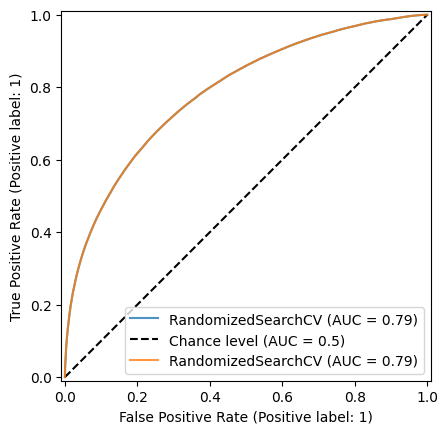

In [142]:
# Evaluating the model
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rs_model, X_test_t, y_test, ax=ax, alpha=0.8, plot_chance_level=True)
rfc_disp.plot(ax=ax, alpha=0.8)
plt.show()

C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
C:\Users\azaci\anaconda3\envs\dask_env\lib\site-packages\distributed\client.py:3161: UserWarning: Sending large graph of size 1.03 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


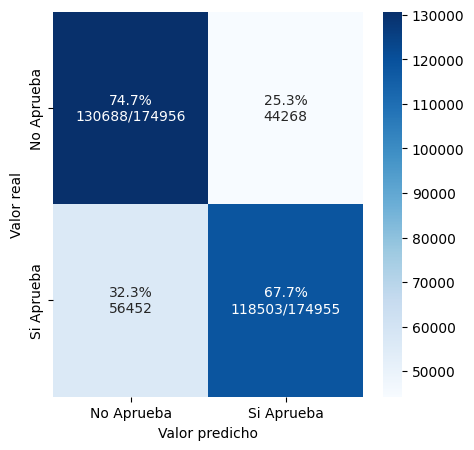

In [143]:
plot_confusion_matrix(y_test, y_pred_model, target_names, ymap=None, figsize=(5,5))